In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import scipy.io as sio
import scipy.optimize as opt

![Alt text](static/img/linier_reg.png )

In [2]:
def hypothesis_fn(θ, X):
    """
    Calculate the prediction vector of linear regression.
    
    Parameters
    ----------
    θ : array_like
        The parameters for linear regression with shape (n + 1 x 1).
    X : array_like
        The set of features with shape (m x n + 1) with bias term.
        
    Returns
    -------
    h : array_like
        The prediction of linear regression with shape (m x 1).
    """
    return X @ θ

![Alt text](static/img/logic_reg_const_func_with_regularization.png )

In [288]:
def squared_error_cost_func(θ, X, y, λ=0.0):
    """
    Calculate the error of linear regression.
    
    Parameters
    ----------
    θ : array_like
        The parameters for linear regression with shape (n + 1 x 1).
    X : array_like
        The set of features with shape (m x n + 1) with bias term.
    y : array_like
        The lables for set of features X with shape (m x 1).
    λ : float, optional
        The regularization parameter.
        
    Returns
    -------
    error : float
        The error of linear regression.
    """
    θ = θ.reshape((X.shape[1], 1))
    m = X.shape[0]
    h = hypothesis_fn(θ, X)
    error = (1 / (2 * m)) * np.power((h - y), 2).sum() + (λ / (2 * m)) * np.power(θ[1:], 2).sum()
    return error

![Alt text](static/img/gradient_descent.png )

In [191]:
def gradient(θ, X, y, λ=0.0):
    """
    Calculate gradient for linear regression.
    
    Parameters
    ----------
    θ : array_like
        The parameters for linear regression with shape (n + 1 x 1).
    X : array_like
        The set of features with shape (m x n + 1) with bias term.
    y : array_like
        The lables for set of features X with shape (m x 1).
    λ : float, optional
        The regularization parameter.
        
    Returns
    -------
    grad : array_like
        The gradient of linear regression with shape equel to θ,
    """

    θ = θ.reshape((X.shape[1], 1))
    grad = np.zeros(θ.shape)
    m = X.shape[0]
    h = hypothesis_fn(θ, X)
    grad = (1 / m) * X.T @ (h - y)
    grad[1:] = grad[1:] + (λ / (2 * m)) * (θ[1:].T @ θ[1:]) 
    return grad

In [202]:
def normalize(X):
    """
    Normalizes the features in X returns a normalized version of X where the mean value of each
    feature is 0 and the standard deviation is 1. This is often a good preprocessing step to do when
    working with learning algorithms.
    Parameters
    ----------
    X : array_like
        An dataset which is a (m x n) matrix, where m is the number of examples,
        and n is the number of dimensions for each example.
    Returns
    -------
    X_norm : array_like
        The normalized input dataset.
    mu : array_like
        A vector of size n corresponding to the mean for each dimension across all examples.
    sigma : array_like
        A vector of size n corresponding to the standard deviations for each dimension across
        all examples.
    """
    mu = np.mean(X, axis=0)
    X_norm = X - mu

    sigma = np.std(X_norm, axis=0, ddof=1)
    X_norm /= sigma
    return X_norm, mu, sigma

## Data preparation

In [136]:
raw_data = sio.loadmat('static/datasets/dam/ex5data1.mat')

In [235]:
X_train, y_train = raw_data['X'], raw_data['y']
X_train = np.concatenate((np.ones((X_train.shape[0], 1)), X_train), axis=1)

X_test, y_test = raw_data['Xtest'], raw_data['ytest']
X_test = np.concatenate((np.ones((X_test.shape[0], 1)), X_test), axis=1)

X_val, y_val = raw_data['Xval'], raw_data['yval']
X_val = np.concatenate((np.ones((X_val.shape[0], 1)), X_val), axis=1)

## Training

#### Gradient Descent 

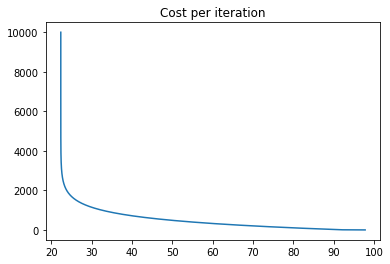

[[13.08716276]
 [ 0.36777479]]


In [145]:
# gradient descent
cost_per_iteration = {}
learning_rate = .001
Theta = np.ones((2,1))
for i in range(10000):
    Theta = Theta - learning_rate * gradient(Theta, X_train, y_train, 0)
    cost = squared_error_cost_func(Theta, X_train, y_train, 0)
    cost_per_iteration[i] = cost
plt.plot(cost_per_iteration.values(), cost_per_iteration.keys())
plt.title('Cost per iteration')
plt.show()
print(Theta)

#### Advanced optimization algorithms

In [268]:
from scipy import optimize

def fit(X, y, λ=0, Theta=None):
    Theta = Theta or np.zeros(X.shape[1])
#     options = {'maxiter': 55}
    opt = optimize.minimize(
        squared_error_cost_func, 
        Theta, 
        jac=gradient, 
        args = (X, y, λ), 
        method='TNC')
    print(opt)
    return opt.x

Theta = fit(X_train, y_train)

     fun: 22.373906495108912
     jac: array([[3.51091822e-10],
       [6.03746590e-08]])
 message: 'Local minimum reached (|pg| ~= 0)'
    nfev: 9
     nit: 4
  status: 0
 success: True
       x: array([13.08790351,  0.36777923])


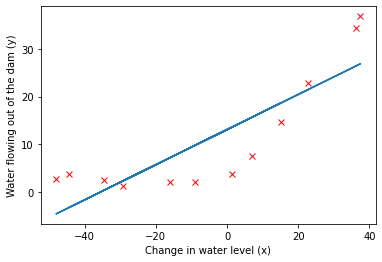

In [156]:
plt.plot(X_train[:,1:], y_train, 'x', color='red')
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')
plt.plot(X_train[:,1:], hypothesis_fn(Theta, X_train));

#### Learning Curve

In [293]:
def learning_curve(X, y, X_val, y_val):
    '''
    A learning curve plots
    training and cross validation error as a function of training set size
    '''
    error_train = {}
    error_val = {}
    for i in range(1, X.shape[0] + 1):
        params = fit(X[:i, :], y[:i])
        error_train[i] = squared_error_cost_func(params, X[:i], y[:i], 0)
        error_val[i] = squared_error_cost_func(params, X_val, y_val, 0)
    clear_output()
    return error_train, error_val


In [294]:
def plot_learing_curve(error_train, error_val):
    plt.plot(error_train.keys(), error_train.values())
    plt.plot(error_val.keys(), error_val.values(), color='green')
    plt.legend(['Train', 'Cross Validation'])
    plt.xlabel('Number of training examples')
    plt.ylabel('Error')
    plt.title('Learning curve')

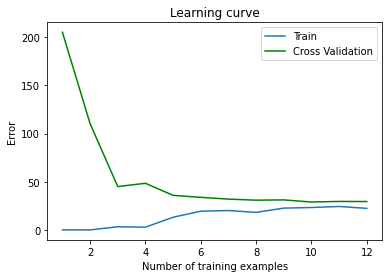

In [295]:
error_train, error_val = learning_curve(X_train, y_train, X_val, y_val)
plot_learing_curve(error_train, error_val)

In the learning curve figure, you can observe that both the train error and cross validation error are high when the number of training examples is increased. This reflects a high bias problem in the model - the linear regression model is too simple and is unable to fit our dataset well. 

In [397]:
def poly_features(X, p):
    X_poly = np.zeros((X.shape[0], p))

    for i in range(p):
        X_poly[:, i] = X[:, 0] ** (i + 1)
    return X_poly

p = 3
X_train_poly = poly_features(X_train[:, [1]], p)
X_train_poly, mu, sigma = normalize(X_train_poly)
X_train_poly = np.concatenate((np.ones((X_train_poly.shape[0], 1)), X_train_poly), axis=1)

X_test_poly = poly_features(X_test[:, [1]], p)
X_test_poly -= mu
X_test_poly /= sigma
X_test_poly = np.concatenate((np.ones((X_test_poly.shape[0], 1)), X_test_poly), axis=1)

X_val_poly = poly_features(X_val[:, [1]], p)
X_val_poly -= mu
X_val_poly /= sigma
X_val_poly = np.concatenate((np.ones((X_val_poly.shape[0], 1)), X_val_poly), axis=1)

In [400]:
Theta_poly = fit(X_train_poly, y_train, .3)

     fun: 5.929730955928782
     jac: array([[ 0.19866946],
       [-0.26108914],
       [ 0.34180613],
       [ 0.28607362]])
 message: 'Linear search failed'
    nfev: 91
     nit: 3
  status: 4
 success: False
       x: array([11.41625878,  8.75452341,  5.70360164,  2.83844147])


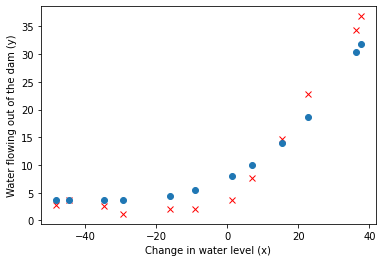

In [401]:
plt.plot(X_train[:,1:], y_train, 'x', color='red')
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')
plt.plot(X_train[:,1:], hypothesis_fn(Theta_poly, X_train_poly), 'o');

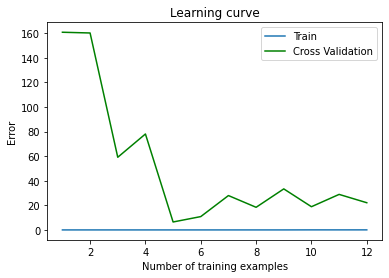

In [396]:
error_train_poly, error_val_poly = learning_curve(X_train_poly, y_train, X_val_poly, y_val)
plot_learing_curve(error_train_poly, error_val_poly)

In [369]:
lambda_vec = [0, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10]


error_train = np.zeros(len(lambda_vec))
error_val = np.zeros(len(lambda_vec))

# ====================== YOUR CODE HERE ======================

for i in range(len(lambda_vec)):
    lambda_try = lambda_vec[i]
    Theta = fit(X_train_poly, y_train, lambda_try)
    error_train[i] = squared_error_cost_func(Theta, X_train_poly, y_train, 0)
    error_val[i] = squared_error_cost_func(Theta, X_val_poly, y_val, 0)




# train_error = []
# val_error = []
# for l in lambdas:
#     print(l)
#     Theta = fit(X_train_poly, y_train, l)
#     train_error.append(squared_error_cost_func(Theta, X_train_poly, y_train, 0))
#     val_error.append(squared_error_cost_func(Theta, X_val_poly, y_val, 0))
clear_output()

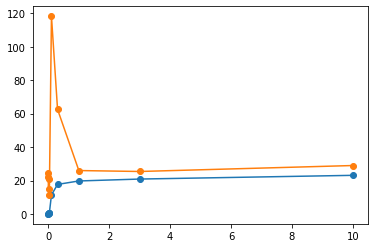

In [370]:
plt.plot(lambda_vec, error_train, '-o')
plt.plot(lambda_vec, error_val, '-o')